<img src='http://www-scf.usc.edu/~ghasemig/images/sharif.png' alt="SUT logo" width=200 height=200 align=left class="saturate" >

<br>
<font face="Times New Roman">
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Introduction to Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Fall 2022<br>
<font color=3C99D size=5>
    Homework 3: Practical - Neural Network <br>
<font color=696880 size=4>
    Javad Hezareh 
    
    
____


### Full Name : MohammadAli MohammadKhani
### Student Number : 98102251
___

# Problem
In this assignment our goal is to develop a framework for simple neural networks, multi layer perceptrons. We are going to use only `numpy` and no other packages to build our own classes and network.

# Setup

In [265]:
###################################
#  Do Not Add any other packages  #
###################################

import numpy as np
# import seaborn as sn
import matplotlib.pyplot as plt
import tqdm
import copy
from utils import *

plt.style.use('ggplot')

# Section 1: Modules implementation (65 Points)
We are going to implement required modules for a neural net. Each of this modules must implement the neccessery functions, `_forward` and `backward`. In the following parts, we will implement `LinearLayer`, `ReLU` and `SoftMax` layers.

## Layers

#### Linear Layer (10 Points)

In [266]:
class LinearLayer(Module):

    def __init__(self, dim_in, dim_out, initializer, reg, alpha):
        self.dim_in = dim_in
        self.dim_out = dim_out
        self.params = {
            'W': initializer(dim_out, dim_in), ### It was reverse in the initializer function
            'b': np.zeros(dim_out),
            'reg': reg,
            'alpha': alpha
        }
        self.grads = dict()
        self.cache = dict()

    def _forward(self, x):
        self.cache['x'] = x
        y = np.matmul(x, self.params['W']) + self.params['b']
        return y

    def backward(self, upstream):
        grad_b = np.sum(upstream, axis = 0)
        grad_w = np.dot(upstream.T,self.cache['x']).T
        grad_x = self.params.get('W').T
        grad_reg = 2 * self.params.get('alpha') * self.params['W'] 
        
        self.grads = {
            'W': grad_w,
            'b': grad_b,
            'x': upstream @ grad_x,
            'reg': grad_reg
        }



In [267]:
# sanity check, output must be from o(e-5)
initializer = lambda x, y: np.random.normal(size=(y, x))
linear = LinearLayer(5, 10, initializer, reg=True, alpha=1)
check_gradient_linear(linear, h=0.00001)


Gradient of loss w.r.t output:
[[0.82955535 0.21114721 0.29056745 0.76196253 0.48381119 0.26313752
  0.17058744 0.68924104 0.14521547 0.36108282]
 [0.17969557 0.61131998 0.90547691 0.09465278 0.04351438 0.82898441
  0.53347611 0.25746229 0.83709683 0.91589097]
 [0.95338569 0.53886974 0.68147718 0.14543317 0.36605854 0.25725115
  0.64065521 0.99467217 0.84735271 0.6116583 ]
 [0.6585274  0.09264464 0.55180917 0.84839143 0.74920247 0.66146217
  0.48228694 0.96546312 0.48159736 0.23890255]
 [0.62490249 0.71391215 0.39654666 0.08349731 0.25206548 0.14235356
  0.84943899 0.30579129 0.18025764 0.72632517]
 [0.07006783 0.77688796 0.90754448 0.97929669 0.15398316 0.39885902
  0.85437948 0.42579468 0.34963434 0.91473698]
 [0.92071169 0.33599422 0.31872931 0.63541889 0.58434891 0.17077758
  0.11395208 0.59733395 0.64102327 0.2976854 ]
 [0.36232214 0.94163488 0.10551311 0.04220206 0.55321597 0.03134844
  0.82945429 0.71557495 0.4421455  0.89943093]
 [0.15358404 0.01888662 0.93738637 0.70363497 0.2

In [268]:
linear.params

{'W': array([[-1.13941071, -0.53129617, -1.14866855,  0.88614357,  0.50889422,
         -1.64319114,  0.56001319, -0.01717377, -0.1453078 ,  2.45469752],
        [ 1.18132369,  0.10509517, -0.16800402, -1.24387676, -0.03536623,
         -0.68148331,  0.16369415, -1.20845244, -0.87574429, -0.22789376],
        [ 2.25399599, -0.11570523, -0.12858258, -0.38925467,  0.05519942,
         -0.40695517,  0.9929189 ,  0.16952744,  1.77420849, -0.07554173],
        [-0.5789992 , -1.41571122, -1.8169549 ,  0.03968644, -0.92874436,
          0.87573056,  0.40293767, -0.16714136, -0.18324947,  0.98342198],
        [ 1.26391657,  0.90218674, -2.06338534,  0.0046825 ,  2.31269952,
          0.80314524, -0.32368342, -0.34445407,  0.91793068, -0.12104749]]),
 'b': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'reg': True,
 'alpha': 1}

#### ReLU Layer (5 Points)

In [269]:
class ReLU(Module):
    def __init__(self):
        self.cache = dict()
        self.grads = dict()

    def _forward(self, x):
        y = np.maximum(0, x)
        self.cache['x'] = x
        return y

    def backward(self, upstream):
        dZ = np.array(upstream, copy = True)
        Z_x = self.cache.get('x')
        dZ[Z_x <= 0] = 0
        self.grads['x'] = dZ


In [270]:
# sanity check - output must be from o(e-8)
relu = ReLU()
check_gradient_relu(relu)

Gradient of loss w.r.t output:
[[0.0584373  0.88325126 0.26846461 0.89464548 0.50320908]
 [0.09177401 0.38804983 0.72265477 0.53096799 0.3455338 ]
 [0.24378035 0.21950653 0.93640053 0.87820106 0.33644566]
 [0.87531923 0.36254974 0.54245228 0.95475059 0.96677731]
 [0.52121319 0.0189511  0.32733035 0.67793154 0.20010495]
 [0.7436883  0.46844046 0.26309046 0.4595906  0.83244012]
 [0.62944357 0.72287473 0.73348264 0.21539666 0.77413853]
 [0.20357441 0.51746258 0.75884962 0.6687436  0.51406511]
 [0.71992879 0.77988594 0.72842911 0.12522849 0.8795159 ]
 [0.64932805 0.24568954 0.25430494 0.42654584 0.25253977]]
Gradient of loss w.r.t input:
[[0.         0.88325126 0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.93640053 0.         0.33644566]
 [0.87531923 0.36254974 0.         0.         0.96677731]
 [0.52121319 0.0189511  0.         0.67793154 0.20010495]
 [0.         0.46844046 0.26309046 0.         0.        ]
 [0.629443

#### SoftMax Layer (15 Points)

We could have a layer that calculate softmax for us. In other word, for input $x\in\mathcal{R}^N$ it would return $y\in\mathcal{R}^n$ where $y_i = \frac{e^{x_i}}{\sum e^{x_i}}$. But this method is not numerical stable because $e^{x_i}$ in this formulation can get very large easly and return `nan`. Instead of that we will implement a logarithmic version of softmax which instead of calculating $\frac{e^{x_i}}{\sum e^{x_i}}$, we will calculate $\log\left(\frac{e^{x_i}}{\sum e^{x_i}}\right) = x_i - \log\sum e^{x_i}$. In order to calculate second term you can use `np.logaddexp` but this function only works on two input. For more than two input, fill in the following function to be able to calculate log sum exp of an array of shape (b,n). `axis=1` means sum over columns and `axis=0` sum over rows.

In [272]:
def logsumexp(array, axis=1):
    assert len(array) >= 2
    return np.log(np.sum(np.exp(array), axis=axis, keepdims=True))

In [271]:
class LogSoftMax(Module):
    def __init__(self):
        self.cache = dict()
        self.grads = dict()

    def _forward(self, x):
        y = x - logsumexp(x)  ### As said in description markdown
        self.cache['y'] = y
        return y

    def backward(self, upstream):
        grad_x = 1 - (1 * np.exp(self.cache['y']).sum(axis=1, keepdims=True))
        self.grads['x'] =  grad_x * upstream

In [273]:
# sanity check, output must be from o(e-7)
sm = LogSoftMax()
check_gradient_softmax(sm)

Gradient of loss w.r.t output:
[[0.1630331  0.13488387 0.64710355 0.267412   0.38909318]
 [0.17558247 0.28087961 0.28324271 0.94903849 0.49365313]
 [0.66110396 0.48183119 0.81942941 0.72267524 0.05972474]
 [0.23687506 0.58419898 0.63517021 0.34454597 0.22345524]
 [0.88441083 0.96840966 0.22989379 0.11408372 0.45871137]
 [0.00832097 0.74025973 0.43923602 0.0739073  0.96269913]
 [0.17190485 0.1383921  0.6479173  0.88009471 0.35911365]
 [0.42453736 0.08015594 0.24649505 0.0371008  0.95956135]
 [0.14149331 0.25348514 0.93081829 0.36581357 0.52428419]
 [0.23683714 0.9252707  0.18926396 0.4527474  0.47814843]]
Gradient of loss w.r.t input:
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00 

## Model (10 Points)
We need a model class which gathers our layers togather and performs forward and backward on all of them.

In [274]:
class MLPModel(Module):
    def __init__(self, layers):
        self.layers = layers

    def _forward(self, x):
        for layer in self.layers:
            x = layer._forward(x)
        o = x
        return o
    
    def backward(self, upstream):
        for layer in self.layers[len(self.layers) - 2::-1]:
            layer.backward(upstream)
            upstream = layer.grads['x']

    def get_parameters(self):
        list_of_params = []
        for layer_index in range(len(self.layers)):
            if isinstance (self.layers[layer_index], LinearLayer):
                list_of_params.append([])
                list_of_params[-1].append(self.layers[layer_index].params)
        return list_of_params


## Loss functions (10 Points)
We need to implement loss functions to be able to train our network. We will implement CrossEntropy loss function. But notice that we have implemented `LogSoftMax` in logarithmic way so input of the following class will be logarithm of probabilities. 

In [280]:
class CrossEntropyLoss(Module):
    def __init__(self, mean=False):
        self.mean = mean
        self.cache = dict()
        self.grads = dict()

    def _forward(self, logprobs, targets):

        m = targets.shape[0]
        p = np.zeros(m)
        log_likelihood = -np.log(p[range(m),targets])
        temp_val = np.sum(log_likelihood) / m
        
        y = 0

        for index in range(len(targets)):
            y -= (logprobs[index, targets[index]])

        self.cache['targets'] = targets
        self.cache['probs'] = logprobs
        return y


    def backward(self, upstream):

        shape_of_gradient = self.cache['probs'].shape

        grad_scores = np.zeros(shape=shape_of_gradient)
        for data in range(shape_of_gradient[0]):
            for node in range(shape_of_gradient[1]):
                grad_scores[data, self.cache['targets'][data]] = -1
        
        self.grads['x'] = grad_scores
        self.grads['final_layer'] = (np.exp(self.cache['probs']) + grad_scores)/shape_of_gradient[0]


In [281]:
# check gradient, output must be from o(e-10)
ce = CrossEntropyLoss()
check_gradient_ce(ce, h=0.0001)

Gradient of loss w.r.t output:
1
Gradient of loss w.r.t input:
[[ 0. -1.  0.  0.  0.]
 [ 0.  0.  0. -1.  0.]
 [ 0.  0.  0.  0. -1.]
 [-1.  0.  0.  0.  0.]
 [-1.  0.  0.  0.  0.]
 [ 0. -1.  0.  0.  0.]
 [ 0.  0.  0.  0. -1.]
 [ 0. -1.  0.  0.  0.]
 [ 0. -1.  0.  0.  0.]
 [ 0.  0.  0.  0. -1.]]
Relative error of delta-loss:
7.212112851378777e-13


## Optimization (15 Points)

Now that we have our network and loss function, we need to update model paremeters. We can do so by using `Optimizer` class that perform updating rule on model parameters. You need to implement `sgd` and `momentum` strategy for this optimizer. Becarefull to consider regularization update for linear units that require regularization.

In [282]:
class Optimizer():

    def __init__(self, layers, strategy, lr):

        self.layers = layers
        self.strategy = strategy
        self.lr = lr
        self.strategies = {
            'sgd': self._sgd,
            'momentum': self._momentum,
        }

    def step(self, *args):
        self.strategies[self.strategy](*args)

    def _sgd(self):
        for layer in self.layers:
            if isinstance(layer, LinearLayer):
                layer.params['W'] -= self.lr * layer.grads['W']
                layer.params['b'] -= self.lr * layer.grads['b']

    
    def _momentum(self, prev_grad):
        coefficient = 0.3
        i = 0
        for layer in self.layers:
            delta_W_1 = coefficient * prev_grad[i] + (1 - coefficient) * layer.grads['W']
            delta_W_2 = coefficient * prev_grad[i + 1] + (1 - coefficient) * layer.grads['b']
            layer.params['W'] = layer.params['W'] - self.lr * delta_W_1
            layer.params['b'] = layer.params['b'] - self.lr * delta_W_2
            prev_grad[i] = delta_W_1
            prev_grad[i + 1] = delta_W_2
            i += 2


# Section 2: CIFAR-10 Classification (35 Points)

Now that we can build a neural network we want to solve CIFAR-10 classification problem. This dataset consists of 60000 $32 \times 32$ coloured images in 10 classes.

## Data preparation (5 Points)

In [74]:
#################################################
##      Run this cell to download dataset      ##
##         the dataset is about 150 MB         ##
#################################################
!./cifar10_downloader.bash  ### This has a problem

!wget http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz -O cifar-10-python.tar.gz
!tar -xzvf cifar-10-python.tar.gz
!rm cifar-10-python.tar.gz

zsh:1: permission denied: ./cifar10_downloader.bash
--2022-12-27 19:02:27--  http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz’

cifar-10-python.tar 100%[===================>] 162.60M  1.67MB/s    in 2m 4s   

2022-12-27 19:04:32 (1.31 MB/s) - ‘cifar-10-python.tar.gz’ saved [170498071/170498071]

x cifar-10-batches-py/
x cifar-10-batches-py/data_batch_4
x cifar-10-batches-py/readme.html
x cifar-10-batches-py/test_batch
x cifar-10-batches-py/data_batch_3
x cifar-10-batches-py/batches.meta
x cifar-10-batches-py/data_batch_2
x cifar-10-batches-py/data_batch_5
x cifar-10-batches-py/data_batch_1


In [283]:
#############################################
##      Run this cell to load dataset      ##
#############################################
data = load_dataset(train_num=4000, test_num=1000)

for k in data.keys():
    print(f'{k}: {data[k].shape}')

X_train: (4000, 32, 32, 3)
Y_train: (4000,)
X_test: (1000, 32, 32, 3)
Y_test: (1000,)


In [284]:
##############################################
##      Split train set to train/val        ##

val_set_x = data['X_train'][0: int(0.2 * len(data['X_train']))].copy()
val_set_y = data['Y_train'][0: int(0.2 * len(data['Y_train']))].copy()


train_set_x = data['X_train'][int(0.2 * len(data['X_train'])): len(data['X_train'])].copy()
train_set_y = data['Y_train'][int(0.2 * len(data['Y_train'])): len(data['Y_train'])].copy()


data['X_val'] = val_set_x
data['Y_val'] = val_set_y

data['X_train'] = train_set_x
data['Y_train'] = train_set_y

##############################################
for k in data.keys():
    print(f'{k}: {data[k].shape}')

X_train: (3200, 32, 32, 3)
Y_train: (3200,)
X_test: (1000, 32, 32, 3)
Y_test: (1000,)
X_val: (800, 32, 32, 3)
Y_val: (800,)


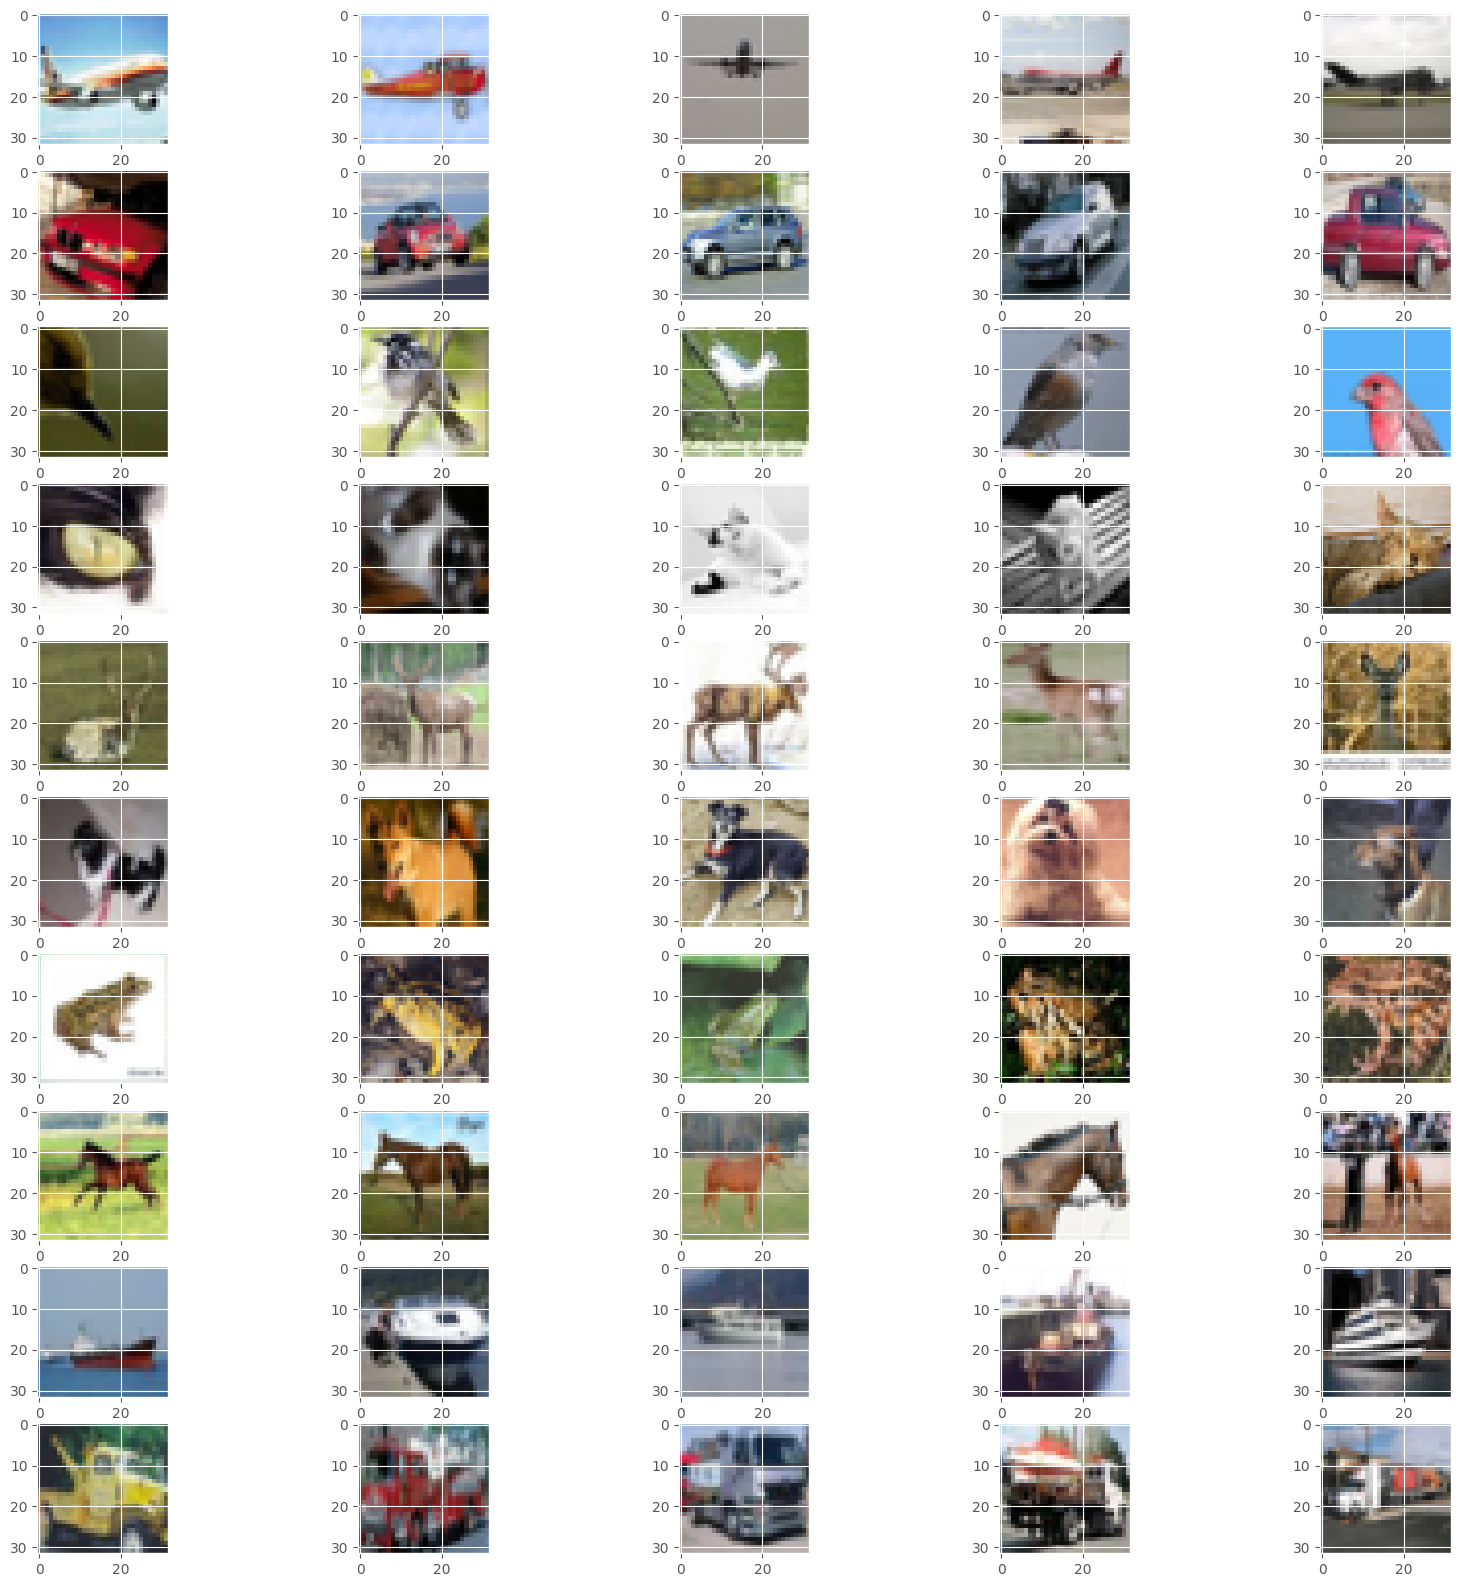

In [246]:
##################################################
##      Visualize 5 samples from each class     ##
##################[Your Code]#####################

fig, ax = plt.subplots(10,5, figsize=(20, 20))


samples = []
for i in range(10):
    samples.append([])


for j in range(10):
    for i in range(len(data['X_train'])):
        if data['Y_train'][i] == j:
            samples[j].append(data['X_train'][i])
        if len(samples[j]) == 5:
            break


for i in range(10):
    for j in range(5):
        ax[i, j].imshow(samples[i][j])



In [285]:
#####################################################
##             Normalize and flatten X             ##
####################[Your Code]######################

data['X_train'] = data.get('X_train').reshape(-1, 32 * 32 * 3)
data['X_val'] = data.get('X_val').reshape(-1, 32 * 32 * 3)
data['X_test'] = data.get('X_test').reshape(-1, 32 * 32 * 3)
    

#####################################################
for k in data.keys():
    print(f'{k}: {data[k].shape}')

X_train: (3200, 3072)
Y_train: (3200,)
X_test: (1000, 3072)
Y_test: (1000,)
X_val: (800, 3072)
Y_val: (800,)


## Train and Test Model (25 Points)

### Batch Sampler
We need to sample bathces from our dataset to train model. Complete the following class to have a random sampler.

In [286]:
class RandomSampler(object):
    def __init__(self, batch_size, dataset, type):
        self.batch_size = batch_size
        self.dataset = dataset
        self.x_key = f'X_{type}'
        self.y_key = f'Y_{type}'
        self.indices = []
        dataset_shape = dataset[self.x_key].shape[0]
        self.num_batches = int(np.floor(dataset_shape / batch_size) + 1)

        array_to_choose_from = np.arange(dataset_shape)
        random_indices = np.random.choice(array_to_choose_from, dataset_shape, replace=False)


        for i in range(self.num_batches):
            if i == (self.num_batches-1):
                self.indices.append(random_indices[i * batch_size:])
            else:
                start_interval = i * batch_size
                end_interval = (i + 1) * batch_size
                self.indices.append(random_indices[start_interval: end_interval])

    def __len__(self):
        assert type(self.num_batches) == int
        return self.num_batches

    def __iter__(self):
        for idx in self.indices:
            x = self.dataset[self.x_key][idx]
            y = self.dataset[self.y_key][idx]
            yield x, y




Fill the following functions to update a confusion matrix and calculate f1 score for a confusion matrix. For multi class f1 score read [here](https://towardsdatascience.com/multi-class-metrics-made-simple-part-ii-the-f1-score-ebe8b2c2ca1).

In [299]:
from math import *
def update_confusion_matrix(conf_matrix, preds, reals):
    fp, fn, tp, tn = 0, 0, 0, 0

    for actual_value, predicted_value in zip(reals, preds):
        if predicted_value == actual_value:
            if predicted_value == 1:
                tp += 1
            else:
                tn += 1
        else:
            if predicted_value == 1:
                fp += 1
            else:
                fn += 1
                
    confu_matrix = [
        [tn, fp],
        [fn, tp]
    ]
    # updating
    for index in range(len(preds)):
      conf_matrix[reals[index],preds[index]] += 1

    return conf_matrix


def f1_score(confusion_matrix):
    TP = np.diag(confusion_matrix)
    FP = np.sum(confusion_matrix, axis=0) - TP
    FN = np.sum(confusion_matrix, axis=1) - TP
    TN = []
    for i in range(10):
        temp = np.delete(confusion_matrix, i, 0)    # delete ith row
        temp = np.delete(temp, i, 1)  # delete ith column
        TN.append(sum(sum(temp)))

    report_precision, report_recall = 0, 0
    for i in range(confusion_matrix.shape[0]):
      
      if (FN + TP)[i] != 0:
        recall = confusion_matrix[i,i]/(FN + TP)[i]
      else:
        recall = 0

      if (FP + TP)[i] != 0 :
        precision = confusion_matrix[i,i]/(FP + TP)[i]
      else:
        precision = 0
    
        
      report_precision += precision * (FN + TP)[i]/np.sum(confusion_matrix)
      report_recall += recall * (FP + TP)[i]/np.sum(confusion_matrix)
    f1_score = (2 * report_precision * report_recall) / (report_precision + report_recall)
    return f1_score


### Define Model
Define an MLP model to solve classification problem.

In [312]:
###############################################
##             Define your model             ##
##     use a good initializer for layers     ##
###############################################

model = MLPModel([
    LinearLayer(32*32*3, 16*16*3, initializer, True, 2),
    ReLU(),
    LinearLayer(16*16*3, 8*8*3, initializer, True, 2),
    ReLU(),
    LinearLayer(8*8*3, 4*4*3, initializer, True, 2),
    ReLU(),
    LinearLayer(4*4*3, 10, initializer, True, 2),
    LogSoftMax()
    ])


In [313]:
#########################################
##          Hyper parameters           ##
#########################################

n_epochs = 60
batch_size = 60
lr = 0.05
reg_coeff = 50

In [314]:
##################################################
##      Define optimizer, loss and sampler      ##
##################################################

optimizer = Optimizer(layers=model.layers, strategy='sgd', lr=lr)
criterion = CrossEntropyLoss()

train_sampler = RandomSampler(batch_size=batch_size, dataset=data, type='train')
val_sampler = RandomSampler(batch_size=batch_size, dataset=data, type='val')
test_sampler = RandomSampler(batch_size=batch_size, dataset=data, type='test')

### Train Model

Fill in the below cell to train the model. Store each epoch loss, accuracy and f1-score. Use f1-score to choose best epoch.

**Note1**: To do backpropagation you need to first call `backward` function of criterion with 1 as its argument to have gradient of loss w.r.t output of this module and then using model `backward` function with `criterion.grads['x']` argument.

**Note2**: You can ignore regularization term in your total loss value and just use criterion, but you must consider that during updating.

In [315]:
#########################################
##      Train and Validation loop      ##
#########################################
train_losses, val_losses = [], []
train_accs, val_accs = [], []
train_f1, val_f1 = [], []
best_model = None
best_f1 = 0

for epoch in range(n_epochs):
    
    # Train Phase
    total_loss = 0
    N = 0
    confusion_mat = np.zeros((10, 10)) ## Initilize conf matrix
    accuracy = 0
    with tqdm.tqdm(enumerate(train_sampler), total=len(train_sampler)) as pbar:
        for i, (x, y) in pbar:
            predction = model._forward(x)
            total_loss += np.sum(criterion._forward(predction, y))
            criterion.backward(1)
            model.backward(criterion.grads['final_layer'])
            optimizer.step()
            N += y.shape[0] 
            
            accuracy += np.sum(predction.argmax(axis=1)==y)
            confusion_mat = update_confusion_matrix(confusion_mat, predction.argmax(axis=1), y)
            f1 = f1_score(confusion_mat)
            pbar.set_description(f'Train {epoch} | Loss:{total_loss/N:.2e} | Acc: {accuracy/N:.2f}| F1: {f1:.2f}|')
    
    # save epoch metrics for train phase
    accuracy /= N
    train_losses.append(total_loss/N)
    train_accs.append(accuracy)
    train_f1.append(f1)
    

    # Validation Phase
    total_loss = 0
    N = 0
    accuracy = 0
    confusion_mat = np.zeros((10, 10))
    with tqdm.tqdm(enumerate(val_sampler), total=len(val_sampler)) as pbar:
        for i, (x, y) in pbar:
            
            predction = model._forward(x)
            total_loss += np.sum(criterion._forward(predction, y))
            N += y.shape[0] 
            accuracy += np.sum(predction.argmax(axis=1)==y)
            confusion_mat = update_confusion_matrix(confusion_mat, predction.argmax(axis=1), y)
            f1 = f1_score(confusion_mat)
            pbar.set_description(f'Val   {epoch} | Loss:{total_loss/N:.2e} | Acc: {accuracy/N:.2f}| F1: {f1:.2f}|')
    
    # save epoch metrics for validation phase
    accuracy /= N
    val_losses.append(total_loss/N)
    val_accs.append(accuracy)
    val_f1.append(f1)
    
    
    #################################
    ##       update best model     ##
    ##          Your Code          ##
    #################################

    if val_f1[-1]>best_f1:
      best_f1 = val_f1[-1]
      best_model = model
    
    
    
    print(f'----------------------------[Epoch{epoch+1} finished!]----------------------------')


Train 0 | Loss:2.30e+00 | Acc: 0.13| F1: 0.15|: 100%|██████████| 54/54 [00:02<00:00, 23.91it/s]
Val   0 | Loss:2.30e+00 | Acc: 0.17| F1: 0.12|: 100%|██████████| 14/14 [00:00<00:00, 83.09it/s]


----------------------------[Epoch1 finished!]----------------------------


Train 1 | Loss:2.29e+00 | Acc: 0.17| F1: 0.15|: 100%|██████████| 54/54 [00:02<00:00, 24.40it/s]
Val   1 | Loss:2.29e+00 | Acc: 0.17| F1: 0.11|: 100%|██████████| 14/14 [00:00<00:00, 90.96it/s]


----------------------------[Epoch2 finished!]----------------------------


Train 2 | Loss:2.27e+00 | Acc: 0.17| F1: 0.15|: 100%|██████████| 54/54 [00:02<00:00, 25.05it/s]
Val   2 | Loss:2.24e+00 | Acc: 0.19| F1: 0.13|: 100%|██████████| 14/14 [00:00<00:00, 88.65it/s]


----------------------------[Epoch3 finished!]----------------------------


Train 3 | Loss:2.19e+00 | Acc: 0.18| F1: 0.17|: 100%|██████████| 54/54 [00:02<00:00, 25.73it/s]
Val   3 | Loss:2.16e+00 | Acc: 0.17| F1: 0.20|: 100%|██████████| 14/14 [00:00<00:00, 84.23it/s]


----------------------------[Epoch4 finished!]----------------------------


Train 4 | Loss:2.12e+00 | Acc: 0.18| F1: 0.19|: 100%|██████████| 54/54 [00:02<00:00, 24.15it/s]
Val   4 | Loss:2.14e+00 | Acc: 0.19| F1: 0.16|: 100%|██████████| 14/14 [00:00<00:00, 71.70it/s]


----------------------------[Epoch5 finished!]----------------------------


Train 5 | Loss:2.09e+00 | Acc: 0.19| F1: 0.24|: 100%|██████████| 54/54 [00:02<00:00, 24.30it/s]
Val   5 | Loss:2.11e+00 | Acc: 0.21| F1: 0.21|: 100%|██████████| 14/14 [00:00<00:00, 90.99it/s]


----------------------------[Epoch6 finished!]----------------------------


Train 6 | Loss:2.07e+00 | Acc: 0.22| F1: 0.26|: 100%|██████████| 54/54 [00:02<00:00, 23.46it/s]
Val   6 | Loss:2.08e+00 | Acc: 0.23| F1: 0.26|: 100%|██████████| 14/14 [00:00<00:00, 51.80it/s]


----------------------------[Epoch7 finished!]----------------------------


Train 7 | Loss:2.04e+00 | Acc: 0.23| F1: 0.26|: 100%|██████████| 54/54 [00:02<00:00, 22.57it/s]
Val   7 | Loss:2.05e+00 | Acc: 0.23| F1: 0.25|: 100%|██████████| 14/14 [00:00<00:00, 74.43it/s]


----------------------------[Epoch8 finished!]----------------------------


Train 8 | Loss:2.01e+00 | Acc: 0.24| F1: 0.28|: 100%|██████████| 54/54 [00:02<00:00, 21.43it/s]
Val   8 | Loss:2.03e+00 | Acc: 0.23| F1: 0.24|: 100%|██████████| 14/14 [00:00<00:00, 70.36it/s]


----------------------------[Epoch9 finished!]----------------------------


Train 9 | Loss:1.98e+00 | Acc: 0.26| F1: 0.29|: 100%|██████████| 54/54 [00:02<00:00, 22.04it/s]
Val   9 | Loss:2.03e+00 | Acc: 0.23| F1: 0.30|: 100%|██████████| 14/14 [00:00<00:00, 68.48it/s]


----------------------------[Epoch10 finished!]----------------------------


Train 10 | Loss:1.96e+00 | Acc: 0.26| F1: 0.28|: 100%|██████████| 54/54 [00:02<00:00, 20.87it/s]
Val   10 | Loss:2.03e+00 | Acc: 0.24| F1: 0.32|: 100%|██████████| 14/14 [00:00<00:00, 75.27it/s]


----------------------------[Epoch11 finished!]----------------------------


Train 11 | Loss:1.95e+00 | Acc: 0.27| F1: 0.29|: 100%|██████████| 54/54 [00:02<00:00, 21.62it/s]
Val   11 | Loss:2.02e+00 | Acc: 0.25| F1: 0.34|: 100%|██████████| 14/14 [00:00<00:00, 74.51it/s]


----------------------------[Epoch12 finished!]----------------------------


Train 12 | Loss:1.93e+00 | Acc: 0.28| F1: 0.29|: 100%|██████████| 54/54 [00:02<00:00, 21.10it/s]
Val   12 | Loss:2.01e+00 | Acc: 0.25| F1: 0.35|: 100%|██████████| 14/14 [00:00<00:00, 68.91it/s]


----------------------------[Epoch13 finished!]----------------------------


Train 13 | Loss:1.91e+00 | Acc: 0.29| F1: 0.31|: 100%|██████████| 54/54 [00:02<00:00, 22.40it/s]
Val   13 | Loss:2.01e+00 | Acc: 0.25| F1: 0.35|: 100%|██████████| 14/14 [00:00<00:00, 75.49it/s]


----------------------------[Epoch14 finished!]----------------------------


Train 14 | Loss:1.89e+00 | Acc: 0.30| F1: 0.32|: 100%|██████████| 54/54 [00:02<00:00, 21.32it/s]
Val   14 | Loss:2.01e+00 | Acc: 0.25| F1: 0.33|: 100%|██████████| 14/14 [00:00<00:00, 75.31it/s]


----------------------------[Epoch15 finished!]----------------------------


Train 15 | Loss:1.87e+00 | Acc: 0.31| F1: 0.33|: 100%|██████████| 54/54 [00:02<00:00, 21.58it/s]
Val   15 | Loss:2.01e+00 | Acc: 0.24| F1: 0.32|: 100%|██████████| 14/14 [00:00<00:00, 62.84it/s]


----------------------------[Epoch16 finished!]----------------------------


Train 16 | Loss:1.86e+00 | Acc: 0.32| F1: 0.33|: 100%|██████████| 54/54 [00:02<00:00, 19.80it/s]
Val   16 | Loss:2.02e+00 | Acc: 0.25| F1: 0.33|: 100%|██████████| 14/14 [00:00<00:00, 68.78it/s]


----------------------------[Epoch17 finished!]----------------------------


Train 17 | Loss:1.84e+00 | Acc: 0.32| F1: 0.34|: 100%|██████████| 54/54 [00:02<00:00, 20.51it/s]
Val   17 | Loss:2.02e+00 | Acc: 0.24| F1: 0.32|: 100%|██████████| 14/14 [00:00<00:00, 61.98it/s]


----------------------------[Epoch18 finished!]----------------------------


Train 18 | Loss:1.82e+00 | Acc: 0.33| F1: 0.34|: 100%|██████████| 54/54 [00:02<00:00, 22.08it/s]
Val   18 | Loss:2.02e+00 | Acc: 0.25| F1: 0.35|: 100%|██████████| 14/14 [00:00<00:00, 69.59it/s]


----------------------------[Epoch19 finished!]----------------------------


Train 19 | Loss:1.80e+00 | Acc: 0.34| F1: 0.35|: 100%|██████████| 54/54 [00:02<00:00, 21.03it/s]
Val   19 | Loss:2.03e+00 | Acc: 0.25| F1: 0.37|: 100%|██████████| 14/14 [00:00<00:00, 71.76it/s]


----------------------------[Epoch20 finished!]----------------------------


Train 20 | Loss:1.79e+00 | Acc: 0.35| F1: 0.36|: 100%|██████████| 54/54 [00:02<00:00, 21.94it/s]
Val   20 | Loss:2.04e+00 | Acc: 0.25| F1: 0.38|: 100%|██████████| 14/14 [00:00<00:00, 61.28it/s]


----------------------------[Epoch21 finished!]----------------------------


Train 21 | Loss:1.77e+00 | Acc: 0.35| F1: 0.36|: 100%|██████████| 54/54 [00:02<00:00, 23.46it/s]
Val   21 | Loss:2.06e+00 | Acc: 0.25| F1: 0.39|: 100%|██████████| 14/14 [00:00<00:00, 83.44it/s]


----------------------------[Epoch22 finished!]----------------------------


Train 22 | Loss:1.75e+00 | Acc: 0.36| F1: 0.37|: 100%|██████████| 54/54 [00:02<00:00, 22.12it/s]
Val   22 | Loss:2.07e+00 | Acc: 0.26| F1: 0.40|: 100%|██████████| 14/14 [00:00<00:00, 84.92it/s]


----------------------------[Epoch23 finished!]----------------------------


Train 23 | Loss:1.74e+00 | Acc: 0.37| F1: 0.38|: 100%|██████████| 54/54 [00:02<00:00, 24.44it/s]
Val   23 | Loss:2.09e+00 | Acc: 0.25| F1: 0.37|: 100%|██████████| 14/14 [00:00<00:00, 87.91it/s]


----------------------------[Epoch24 finished!]----------------------------


Train 24 | Loss:1.72e+00 | Acc: 0.38| F1: 0.38|: 100%|██████████| 54/54 [00:02<00:00, 23.45it/s]
Val   24 | Loss:2.11e+00 | Acc: 0.25| F1: 0.36|: 100%|██████████| 14/14 [00:00<00:00, 82.75it/s]


----------------------------[Epoch25 finished!]----------------------------


Train 25 | Loss:1.70e+00 | Acc: 0.39| F1: 0.39|: 100%|██████████| 54/54 [00:02<00:00, 24.48it/s]
Val   25 | Loss:2.12e+00 | Acc: 0.26| F1: 0.36|: 100%|██████████| 14/14 [00:00<00:00, 74.83it/s]


----------------------------[Epoch26 finished!]----------------------------


Train 26 | Loss:1.69e+00 | Acc: 0.39| F1: 0.40|: 100%|██████████| 54/54 [00:02<00:00, 22.80it/s]
Val   26 | Loss:2.14e+00 | Acc: 0.25| F1: 0.35|: 100%|██████████| 14/14 [00:00<00:00, 69.58it/s]


----------------------------[Epoch27 finished!]----------------------------


Train 27 | Loss:1.67e+00 | Acc: 0.40| F1: 0.41|: 100%|██████████| 54/54 [00:02<00:00, 24.48it/s]
Val   27 | Loss:2.14e+00 | Acc: 0.26| F1: 0.35|: 100%|██████████| 14/14 [00:00<00:00, 61.39it/s]


----------------------------[Epoch28 finished!]----------------------------


Train 28 | Loss:1.66e+00 | Acc: 0.41| F1: 0.41|: 100%|██████████| 54/54 [00:02<00:00, 24.35it/s]
Val   28 | Loss:2.16e+00 | Acc: 0.26| F1: 0.36|: 100%|██████████| 14/14 [00:00<00:00, 69.21it/s]


----------------------------[Epoch29 finished!]----------------------------


Train 29 | Loss:1.64e+00 | Acc: 0.41| F1: 0.42|: 100%|██████████| 54/54 [00:02<00:00, 24.28it/s]
Val   29 | Loss:2.11e+00 | Acc: 0.28| F1: 0.41|: 100%|██████████| 14/14 [00:00<00:00, 73.35it/s]


----------------------------[Epoch30 finished!]----------------------------


Train 30 | Loss:1.63e+00 | Acc: 0.42| F1: 0.42|: 100%|██████████| 54/54 [00:02<00:00, 24.95it/s]
Val   30 | Loss:2.08e+00 | Acc: 0.27| F1: 0.40|: 100%|██████████| 14/14 [00:00<00:00, 74.36it/s]


----------------------------[Epoch31 finished!]----------------------------


Train 31 | Loss:1.61e+00 | Acc: 0.43| F1: 0.43|: 100%|██████████| 54/54 [00:02<00:00, 24.56it/s]
Val   31 | Loss:2.10e+00 | Acc: 0.28| F1: 0.41|: 100%|██████████| 14/14 [00:00<00:00, 81.21it/s]


----------------------------[Epoch32 finished!]----------------------------


Train 32 | Loss:1.60e+00 | Acc: 0.43| F1: 0.43|: 100%|██████████| 54/54 [00:02<00:00, 22.46it/s]
Val   32 | Loss:1.99e+00 | Acc: 0.30| F1: 0.40|: 100%|██████████| 14/14 [00:00<00:00, 77.83it/s]


----------------------------[Epoch33 finished!]----------------------------


Train 33 | Loss:1.58e+00 | Acc: 0.43| F1: 0.44|: 100%|██████████| 54/54 [00:02<00:00, 23.36it/s]
Val   33 | Loss:2.01e+00 | Acc: 0.29| F1: 0.39|: 100%|██████████| 14/14 [00:00<00:00, 78.49it/s]


----------------------------[Epoch34 finished!]----------------------------


Train 34 | Loss:1.56e+00 | Acc: 0.44| F1: 0.44|: 100%|██████████| 54/54 [00:02<00:00, 23.71it/s]
Val   34 | Loss:2.03e+00 | Acc: 0.30| F1: 0.40|: 100%|██████████| 14/14 [00:00<00:00, 79.34it/s]


----------------------------[Epoch35 finished!]----------------------------


Train 35 | Loss:1.54e+00 | Acc: 0.45| F1: 0.45|: 100%|██████████| 54/54 [00:02<00:00, 23.78it/s]
Val   35 | Loss:2.10e+00 | Acc: 0.30| F1: 0.42|: 100%|██████████| 14/14 [00:00<00:00, 62.76it/s]


----------------------------[Epoch36 finished!]----------------------------


Train 36 | Loss:1.54e+00 | Acc: 0.45| F1: 0.46|: 100%|██████████| 54/54 [00:02<00:00, 24.80it/s]
Val   36 | Loss:1.94e+00 | Acc: 0.32| F1: 0.39|: 100%|██████████| 14/14 [00:00<00:00, 86.47it/s]


----------------------------[Epoch37 finished!]----------------------------


Train 37 | Loss:1.53e+00 | Acc: 0.45| F1: 0.46|: 100%|██████████| 54/54 [00:02<00:00, 24.74it/s]
Val   37 | Loss:1.92e+00 | Acc: 0.30| F1: 0.37|: 100%|██████████| 14/14 [00:00<00:00, 85.31it/s]


----------------------------[Epoch38 finished!]----------------------------


Train 38 | Loss:1.50e+00 | Acc: 0.47| F1: 0.47|: 100%|██████████| 54/54 [00:02<00:00, 24.25it/s]
Val   38 | Loss:1.99e+00 | Acc: 0.29| F1: 0.38|: 100%|██████████| 14/14 [00:00<00:00, 80.81it/s]


----------------------------[Epoch39 finished!]----------------------------


Train 39 | Loss:1.50e+00 | Acc: 0.47| F1: 0.47|: 100%|██████████| 54/54 [00:02<00:00, 23.59it/s]
Val   39 | Loss:1.97e+00 | Acc: 0.31| F1: 0.41|: 100%|██████████| 14/14 [00:00<00:00, 71.97it/s]


----------------------------[Epoch40 finished!]----------------------------


Train 40 | Loss:1.46e+00 | Acc: 0.48| F1: 0.48|: 100%|██████████| 54/54 [00:02<00:00, 23.51it/s]
Val   40 | Loss:2.09e+00 | Acc: 0.31| F1: 0.45|: 100%|██████████| 14/14 [00:00<00:00, 96.48it/s]


----------------------------[Epoch41 finished!]----------------------------


Train 41 | Loss:1.43e+00 | Acc: 0.49| F1: 0.49|: 100%|██████████| 54/54 [00:02<00:00, 24.55it/s]
Val   41 | Loss:1.92e+00 | Acc: 0.33| F1: 0.38|: 100%|██████████| 14/14 [00:00<00:00, 84.05it/s]


----------------------------[Epoch42 finished!]----------------------------


Train 42 | Loss:1.48e+00 | Acc: 0.48| F1: 0.48|: 100%|██████████| 54/54 [00:02<00:00, 24.32it/s]
Val   42 | Loss:2.00e+00 | Acc: 0.32| F1: 0.41|: 100%|██████████| 14/14 [00:00<00:00, 95.72it/s]


----------------------------[Epoch43 finished!]----------------------------


Train 43 | Loss:1.43e+00 | Acc: 0.49| F1: 0.49|: 100%|██████████| 54/54 [00:02<00:00, 24.14it/s]
Val   43 | Loss:1.94e+00 | Acc: 0.34| F1: 0.40|: 100%|██████████| 14/14 [00:00<00:00, 85.71it/s]


----------------------------[Epoch44 finished!]----------------------------


Train 44 | Loss:1.40e+00 | Acc: 0.50| F1: 0.51|: 100%|██████████| 54/54 [00:02<00:00, 23.86it/s]
Val   44 | Loss:2.06e+00 | Acc: 0.32| F1: 0.42|: 100%|██████████| 14/14 [00:00<00:00, 99.35it/s]


----------------------------[Epoch45 finished!]----------------------------


Train 45 | Loss:1.35e+00 | Acc: 0.52| F1: 0.53|: 100%|██████████| 54/54 [00:02<00:00, 24.25it/s]
Val   45 | Loss:2.26e+00 | Acc: 0.31| F1: 0.37|: 100%|██████████| 14/14 [00:00<00:00, 90.10it/s]


----------------------------[Epoch46 finished!]----------------------------


Train 46 | Loss:1.40e+00 | Acc: 0.51| F1: 0.51|: 100%|██████████| 54/54 [00:02<00:00, 24.06it/s]
Val   46 | Loss:1.81e+00 | Acc: 0.37| F1: 0.38|: 100%|██████████| 14/14 [00:00<00:00, 64.57it/s]


----------------------------[Epoch47 finished!]----------------------------


Train 47 | Loss:1.34e+00 | Acc: 0.52| F1: 0.53|: 100%|██████████| 54/54 [00:02<00:00, 22.97it/s]
Val   47 | Loss:1.86e+00 | Acc: 0.35| F1: 0.38|: 100%|██████████| 14/14 [00:00<00:00, 78.06it/s]


----------------------------[Epoch48 finished!]----------------------------


Train 48 | Loss:1.30e+00 | Acc: 0.54| F1: 0.54|: 100%|██████████| 54/54 [00:02<00:00, 22.96it/s]
Val   48 | Loss:2.08e+00 | Acc: 0.34| F1: 0.43|: 100%|██████████| 14/14 [00:00<00:00, 75.70it/s]


----------------------------[Epoch49 finished!]----------------------------


Train 49 | Loss:1.34e+00 | Acc: 0.52| F1: 0.52|: 100%|██████████| 54/54 [00:02<00:00, 24.00it/s]
Val   49 | Loss:1.87e+00 | Acc: 0.34| F1: 0.38|: 100%|██████████| 14/14 [00:00<00:00, 96.49it/s]


----------------------------[Epoch50 finished!]----------------------------


Train 50 | Loss:1.41e+00 | Acc: 0.51| F1: 0.51|: 100%|██████████| 54/54 [00:02<00:00, 24.34it/s]
Val   50 | Loss:1.86e+00 | Acc: 0.38| F1: 0.41|: 100%|██████████| 14/14 [00:00<00:00, 88.61it/s]


----------------------------[Epoch51 finished!]----------------------------


Train 51 | Loss:1.32e+00 | Acc: 0.53| F1: 0.53|: 100%|██████████| 54/54 [00:02<00:00, 24.49it/s]
Val   51 | Loss:1.89e+00 | Acc: 0.34| F1: 0.40|: 100%|██████████| 14/14 [00:00<00:00, 87.87it/s]


----------------------------[Epoch52 finished!]----------------------------


Train 52 | Loss:1.30e+00 | Acc: 0.54| F1: 0.54|: 100%|██████████| 54/54 [00:02<00:00, 23.49it/s]
Val   52 | Loss:1.90e+00 | Acc: 0.35| F1: 0.41|: 100%|██████████| 14/14 [00:00<00:00, 79.27it/s]


----------------------------[Epoch53 finished!]----------------------------


Train 53 | Loss:1.28e+00 | Acc: 0.54| F1: 0.54|: 100%|██████████| 54/54 [00:02<00:00, 22.30it/s]
Val   53 | Loss:1.89e+00 | Acc: 0.33| F1: 0.39|: 100%|██████████| 14/14 [00:00<00:00, 79.84it/s]


----------------------------[Epoch54 finished!]----------------------------


Train 54 | Loss:1.24e+00 | Acc: 0.57| F1: 0.57|: 100%|██████████| 54/54 [00:02<00:00, 21.19it/s]
Val   54 | Loss:1.94e+00 | Acc: 0.35| F1: 0.40|: 100%|██████████| 14/14 [00:00<00:00, 67.32it/s]


----------------------------[Epoch55 finished!]----------------------------


Train 55 | Loss:1.43e+00 | Acc: 0.52| F1: 0.52|: 100%|██████████| 54/54 [00:02<00:00, 20.61it/s]
Val   55 | Loss:2.49e+00 | Acc: 0.28| F1: 0.41|: 100%|██████████| 14/14 [00:00<00:00, 78.91it/s]


----------------------------[Epoch56 finished!]----------------------------


Train 56 | Loss:1.29e+00 | Acc: 0.55| F1: 0.55|: 100%|██████████| 54/54 [00:02<00:00, 23.12it/s]
Val   56 | Loss:2.10e+00 | Acc: 0.34| F1: 0.40|: 100%|██████████| 14/14 [00:00<00:00, 83.10it/s]


----------------------------[Epoch57 finished!]----------------------------


Train 57 | Loss:1.21e+00 | Acc: 0.57| F1: 0.58|: 100%|██████████| 54/54 [00:02<00:00, 23.83it/s]
Val   57 | Loss:2.11e+00 | Acc: 0.33| F1: 0.41|: 100%|██████████| 14/14 [00:00<00:00, 83.81it/s]


----------------------------[Epoch58 finished!]----------------------------


Train 58 | Loss:1.29e+00 | Acc: 0.55| F1: 0.55|: 100%|██████████| 54/54 [00:02<00:00, 23.58it/s]
Val   58 | Loss:2.06e+00 | Acc: 0.33| F1: 0.43|: 100%|██████████| 14/14 [00:00<00:00, 81.28it/s]


----------------------------[Epoch59 finished!]----------------------------


Train 59 | Loss:1.24e+00 | Acc: 0.56| F1: 0.56|: 100%|██████████| 54/54 [00:02<00:00, 24.04it/s]
Val   59 | Loss:1.89e+00 | Acc: 0.35| F1: 0.40|: 100%|██████████| 14/14 [00:00<00:00, 88.90it/s]

----------------------------[Epoch60 finished!]----------------------------


### Test Model

Text(0, 0.5, 'F1 per epoch')

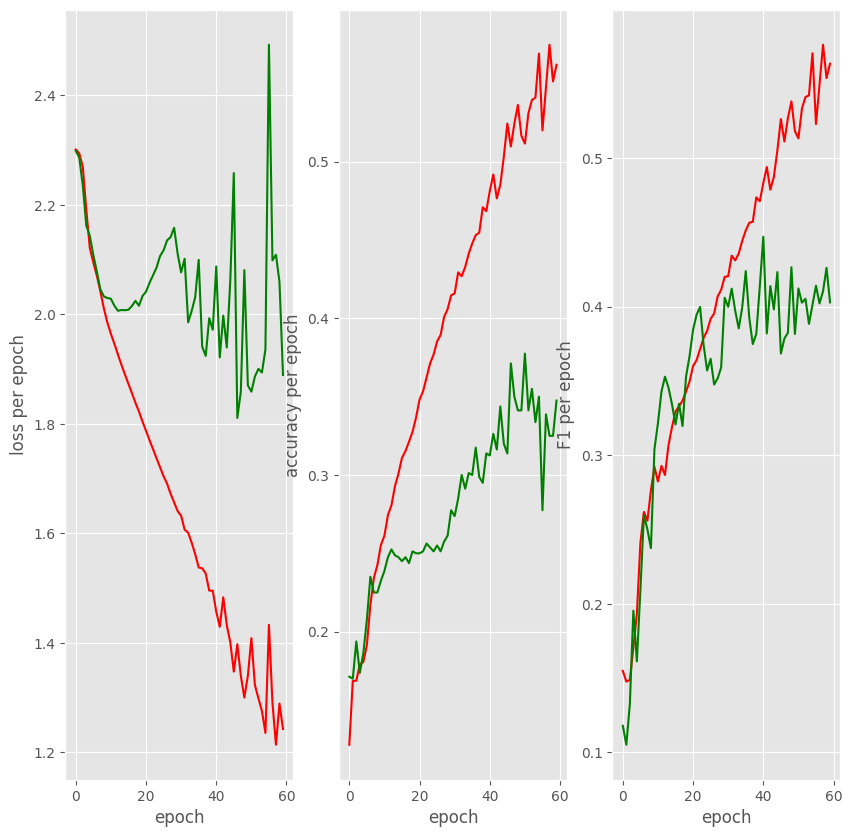

In [316]:
######################################################################
##      Plot train and validation loss, accuracy and f1 graphs      ##
######################################################################
fig, ax = plt.subplots(1, 3, figsize=(10, 10))


ax[0].plot(train_losses, color='r', label='train loss')
ax[0].plot(val_losses, color='g', label='validation loss')
ax[0].set_xlabel('epoch')
ax[0].set_ylabel('loss per epoch')

ax[1].plot(train_accs, color='r', label='train accuracy')
ax[1].plot(val_accs, color='g', label='validation accuracy')
ax[1].set_xlabel('epoch')
ax[1].set_ylabel('accuracy per epoch')

ax[2].plot(train_f1, color='r', label='train F1')
ax[2].plot(val_f1, color='g', label='validation F1')
ax[2].set_xlabel('epoch')
ax[2].set_ylabel('F1 per epoch')


loss=1.8285129532487476 , accuracy=0.367, f1=0.44109766803521244


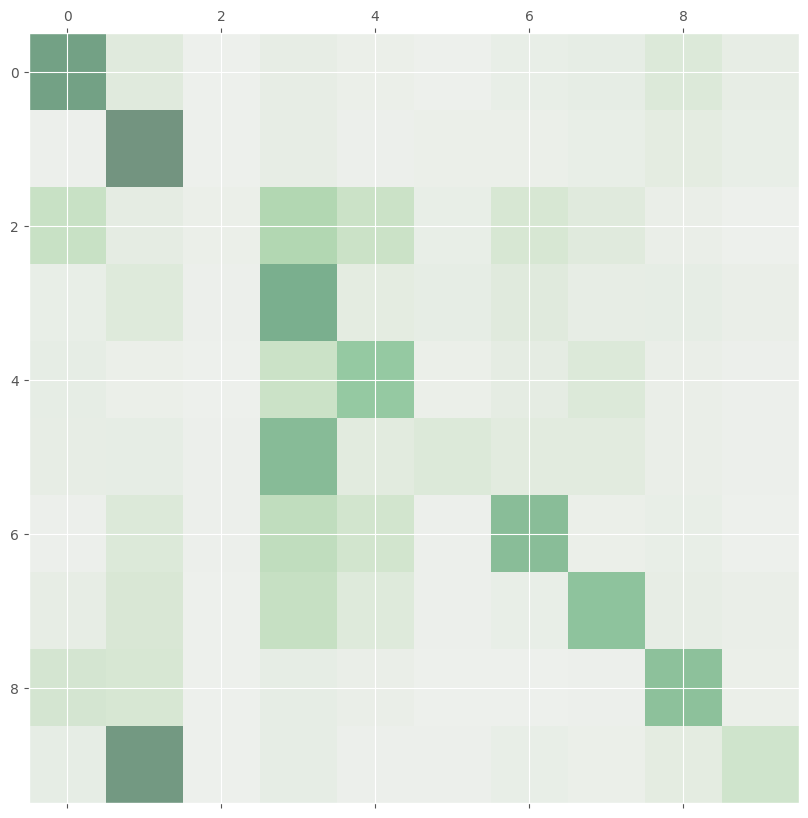

In [317]:
############################################################
##                  Test your best model                  ##
##          Report loss, accuracy and f1 metrics          ##
##      Also plot the confusion matrix for test data      ##
############################################################

# load best model
## Already Loaded


print(best_model)
# report
prediction = best_model._forward(data['X_test'])
y = data['Y_test']
confusion_matrix = np.zeros((10,10))
loss = CrossEntropyLoss()._forward(prediction, y) / y.shape[0]
accuracy = np.sum(prediction.argmax(-1)==y)/y.shape[0]
confusion_matrix = update_confusion_matrix(confusion_matrix, prediction.argmax(-1), y)
f1 = f1_score(confusion_matrix)


fig, ax = plt.subplots(figsize=(15,10)) 
ax.matshow(confusion_matrix, cmap=plt.cm.Greens, alpha=0.5)
print(f'loss={loss} , accuracy={accuracy}, f1={f1}')


## Weights Visualization (5 Points)

For the last part we want to visualize weights matrix of the first layer.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[ 1.42692909e-02  4.97436193e-03 -6.74598871e-03]
  [ 1.00861441e-02 -1.22616761e-02 -2.02108507e-02]
  [-1.78820773e-02 -9.95116883e-03  9.64107561e-03]
  ...
  [-1.37864404e-03 -8.77772369e-03 -3.16536089e-03]
  [-4.31926809e-03 -1.14952103e-02  3.29586879e-03]
  [-4.87582810e-03 -5.83122762e-03  1.60813932e-02]]

 [[-1.69583844e-02 -9.56442430e-03  1.03024387e-02]
  [-3.92561851e-03 -2.22882768e-02 -5.07048275e-03]
  [ 3.36356499e-03 -7.56662866e-03 -4.55204069e-03]
  ...
  [-9.41523002e-03 -5.15546371e-03  1.22250329e-02]
  [ 3.21421636e-02  1.48700386e-02  2.07335835e-03]
  [ 2.54736772e-02  8.62933244e-03  1.53957551e-03]]

 [[ 9.54508328e-03  1.38245018e-02  2.03646535e-03]
  [-2.20263877e-02 -4.54048230e-03  5.02650679e-03]
  [-1.56271252e-02  1.14253425e-03 -9.40470577e-03]
  ...
  [ 2.57276981e-02 -5.88824977e-03  7.22336780e-03]
  [ 6.97536206e-03  7.99556896e-03  1.09561943e-02]
  [ 2.25418399e-02  2.38784182e-02  1.23765483e-02]]

 ...

 [[ 2.14592838e-02 -1.40997777e-02

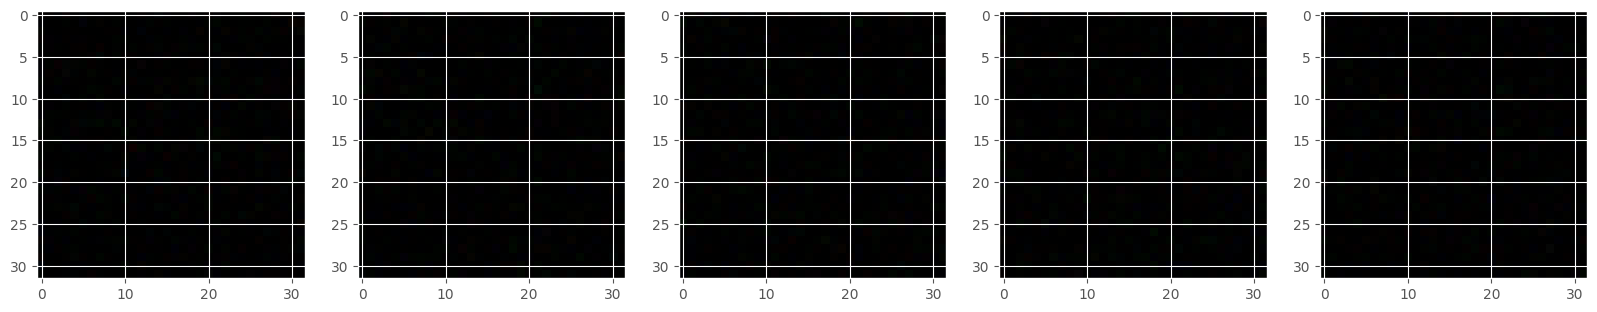

In [326]:
import warnings; warnings.simplefilter('ignore')
n = 5
counter = 0

fig, ax = plt.subplots(1, n)

fig.set_figwidth(20)
fig.set_figheight(20)

for layer_idx in range(len(best_model.layers)):
    if counter == n:
        break
    temp_weight = best_model.layers[0].params['W'].reshape((-1, 32, 32, 3))
    img = temp_weight[counter]
    ax[counter].imshow(img, cmap='winter')
    counter += 1

